In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split
from joblib import dump, load
from sklearn.metrics import plot_confusion_matrix
from tensorflow.keras import layers as k
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
import heartpy as hp

In [2]:
data = pd.read_csv('data/preprocessedDREAMER_V2.csv', index_col='Unnamed: 0')
labels = pd.read_csv('data/ASCERTAIN_labels_cleaned.csv', index_col='RowIdx')

# Fixing Data

In [3]:
data.head()

,P01C1,P01C2,P01C3,P01C4,P01C5,P01C6,P01C7,P01C8,P01C9,P01C10,...,P55C26,P55C28,P55C29,P55C30,P55C31,P55C33,P55C34,P55C35,P55C36,P57C11
hr,74.092558,78.502305,78.829322,74.392216,76.332158,70.747185,77.374066,76.717180,73.731932,80.140302,...,78.063892,69.857874,77.228112,76.800000,75.702857,77.008565,76.117812,71.281805,76.745182,453.205742
ibi,809.797932,764.308764,761.138091,806.535993,786.038306,848.090278,775.453629,782.093395,813.758681,748.686975,...,768.601190,858.886719,776.919158,781.250000,792.572464,779.134115,788.251769,841.729526,781.808036,132.390203
sdnn,45.632772,29.789658,53.148914,53.795742,41.553153,32.992637,29.301007,37.483391,32.530346,27.319248,...,33.837810,185.880021,37.804367,18.805448,41.819302,46.232841,54.043326,127.886348,55.530707,145.462111
sdsd,28.256993,15.673158,16.851010,27.540715,20.683491,18.693287,15.735633,15.745813,16.814110,15.020118,...,6.639348,17.578125,12.303410,15.733133,15.645332,24.931050,19.043904,81.365518,24.566152,153.180947
rmssd,45.034850,30.517031,33.656399,43.233470,39.847168,35.975623,31.603297,31.126282,35.524947,27.580497,...,12.352647,27.759122,23.328741,24.079742,26.577336,35.934315,31.063685,122.849078,36.602953,220.338020


In [4]:
data.shape

(13, 653)

In [5]:
labels.head()

,P01C1,P01C2,P01C3,P01C4,P01C5,P01C6,P01C7,P01C8,P01C9,P01C10,...,P58C27,P58C28,P58C29,P58C30,P58C31,P58C32,P58C33,P58C34,P58C35,P58C36
RowIdx,,,,,,,,,,,,,,,,,,,,,
Arousal,1,3,1,6,4,4,3,4,4,4,...,3,5,4,4,4,4,4,4,4,4
Valence,1,2,-2,0,1,0,1,2,2,3,...,-2,-2,-2,-1,-1,-1,-1,-3,-2,-2
Engagement,4,5,3,5,4,4,5,5,5,5,...,5,5,5,5,5,5,5,4,5,5


In [6]:
stressLabel = []
for col in data:
    if labels[col].values[1] <= 2.5 and labels[col].values[0] <= 2.5:
        stressLabel.append(1)
    else:
        stressLabel.append(0)

In [7]:
stressLabel.count(1)

100

In [8]:
len(stressLabel)

653

In [9]:
X_train, X_test, y_train, y_test = train_test_split(data.T, stressLabel, test_size=0.3)

rfModel = RandomForestClassifier()
rfModel.fit(X_train, y_train)
rfModel.score(X_test, y_test)



0.8061224489795918

In [40]:
data['P40C5']

hr                  89.901876
ibi                667.394301
sdnn               135.413055
sdsd                34.806214
rmssd               51.674830
pnn20                0.500000
pnn50                0.222222
hr_mad              50.781250
sd1                 36.353551
sd2                113.982504
s                13017.719376
sd1/sd2              0.318940
breathingrate        0.044103
Name: P40C5, dtype: float64

In [11]:
testSeriesData = pd.read_csv('appData.csv')
testSeriesData.head()

,2056.0
0,2056.0
1,2054.0
2,2053.0
3,2069.0
4,2064.0


In [12]:
o1 = pd.read_csv('appData1.csv')
o2 = pd.read_csv('appData2.csv')
o3 = pd.read_csv('appData3.csv')

In [13]:
o1.head()

,2056.0
0,2056.0
1,2054.0
2,2053.0
3,2069.0
4,2064.0


In [14]:
o2.head()

,1984.0
0,1982.0
1,1979.0
2,1979.0
3,1981.0
4,1983.0


In [15]:
o3.head()

,2052.0
0,2040.0
1,2049.0
2,2058.0
3,2038.0
4,2039.0


In [16]:
testSeriesData['2056.0'].iloc[0:15360]

0        2056.0
1        2054.0
2        2053.0
3        2069.0
4        2064.0
          ...  
15355    2291.0
15356    2237.0
15357    2165.0
15358    2115.0
15359    2103.0
Name: 2056.0, Length: 15360, dtype: float64

In [17]:
temp = hp.process(o1['2056.0'], 256)[1]
temp

{'bpm': 78.33547663797935,
 'ibi': 765.936489762931,
 'sdnn': 34.41605920305109,
 'sdsd': 31.22258423691327,
 'rmssd': 43.055714690716115,
 'pnn20': 0.6328293736501079,
 'pnn50': 0.10367170626349892,
 'hr_mad': 19.53125,
 'sd1': 30.4445295775368,
 'sd2': 37.78252635849141,
 's': 3613.683681099977,
 'sd1/sd2': 0.8057833213340581,
 'breathingrate': 0.0985410296692963}

In [18]:
pd.DataFrame(temp, index=[0])

,bpm,ibi,sdnn,sdsd,rmssd,pnn20,pnn50,hr_mad,sd1,sd2,s,sd1/sd2,breathingrate
0,78.335477,765.93649,34.416059,31.222584,43.055715,0.632829,0.103672,19.53125,30.44453,37.782526,3613.683681,0.805783,0.098541


In [42]:
m1 = pd.DataFrame(hp.process(o1['2056.0'], 256)[1], index=[0])
m2 = pd.DataFrame(data['P40C5'])
m3 = pd.DataFrame(hp.process(o3['2052.0'], 256)[1], index=[0])
m3.head()

,bpm,ibi,sdnn,sdsd,rmssd,pnn20,pnn50,hr_mad,sd1,sd2,s,sd1/sd2,breathingrate
0,76.974232,779.48163,46.289217,29.750128,41.738161,0.578588,0.111617,27.34375,29.491598,51.148482,4738.937027,0.576588,0.101187


In [43]:
measureDf = pd.concat([m1, m2, m3], axis=0)
measureDf.to_csv('appDataMeasures.csv', index=False)
measureDf.head()

,bpm,ibi,sdnn,sdsd,rmssd,pnn20,pnn50,hr_mad,sd1,sd2,s,sd1/sd2,breathingrate,P40C5
0,78.335477,765.93649,34.416059,31.222584,43.055715,0.632829,0.103672,19.53125,30.44453,37.782526,3613.683681,0.805783,0.098541,NaN
hr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.901876
ibi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,667.394301
sdnn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,135.413055
sdsd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.806214


In [21]:
rfModel = load('rf.joblib')

In [22]:
p1 = rfModel.predict(m1.values.reshape(1, -1))
p2 = rfModel.predict(m2.values.reshape(1, -1))
p3 = rfModel.predict(m3.values.reshape(1, -1))

print(p1, p2, p3)

[0] [1] [0]


In [23]:
# hp.process(testSeriesData['2056.0'].iloc[15360:30720], 256)

In [24]:
# testSeriesData = testSeriesData['2056.0'].to_list()

In [25]:
# mult = 256*60
# # for i in range(1,5):
#     print((i-1)*mult, i*mult)
#     readings = hp.process(testSeriesData['2056.0'].iloc[(i-1)*mult: i*mult], 256)[1].values()

In [39]:
idx = 0
count = 0
for row in data.columns:
    if(rfModel.predict(data[row].T.values.reshape(1, -1)) == 1 and stressLabel[idx] == 1):
        print(row)
        print(rfModel.predict_proba(data[row].T.values.reshape(1, -1)))
        count += 1
    idx += 1

P01C1
[[0.29 0.71]]
P01C3
[[0.36 0.64]]
P01C11
[[0.27 0.73]]
P01C13
[[0.21 0.79]]
P01C16
[[0.35 0.65]]
P01C17
[[0.22 0.78]]
P01C34
[[0.32 0.68]]
P03C10
[[0.44 0.56]]
P03C11
[[0.24 0.76]]
P03C12
[[0.33 0.67]]
P03C13
[[0.23 0.77]]
P03C19
[[0.33 0.67]]
P03C24
[[0.23 0.77]]
P03C27
[[0.26 0.74]]
P04C19
[[0.37 0.63]]
P05C10
[[0.33 0.67]]
P05C17
[[0.32 0.68]]
P05C24
[[0.32 0.68]]
P05C27
[[0.47 0.53]]
P05C29
[[0.28 0.72]]
P08C2
[[0.28 0.72]]
P08C18
[[0.45 0.55]]
P13C13
[[0.4 0.6]]
P13C14
[[0.47 0.53]]
P13C18
[[0.4 0.6]]
P13C23
[[0.29 0.71]]
P13C34
[[0.35 0.65]]
P15C10
[[0.34 0.66]]
P20C10
[[0.37 0.63]]
P20C28
[[0.37 0.63]]
P24C17
[[0.29 0.71]]
P24C18
[[0.21 0.79]]
P24C24
[[0.25 0.75]]
P24C26
[[0.21 0.79]]
P25C22
[[0.26 0.74]]
P27C2
[[0.37 0.63]]
P27C10
[[0.33 0.67]]
P27C15
[[0.29 0.71]]
P27C20
[[0.27 0.73]]
P32C12
[[0.31 0.69]]
P35C1
[[0.25 0.75]]
P35C6
[[0.44 0.56]]
P35C11
[[0.24 0.76]]
P35C13
[[0.27 0.73]]
P35C34
[[0.37 0.63]]
P36C15
[[0.41 0.59]]
P36C19
[[0.25 0.75]]
P37C1
[[0.24 0.76]]
P37

In [27]:
data['P01C1']

hr                 74.092558
ibi               809.797932
sdnn               45.632772
sdsd               28.256993
rmssd              45.034850
pnn20               0.679389
pnn50               0.221374
hr_mad             27.343750
sd1                31.842660
sd2                53.657112
s                5367.678726
sd1/sd2             0.593447
breathingrate       0.287994
Name: P01C1, dtype: float64

In [28]:
count

70

In [29]:
model = tf.keras.Sequential()
model.add(k.Dense(16, input_dim=13, activation='relu'))
model.add(k.Dense(8, activation='relu'))
model.add(k.Dense(4, activation='relu'))
model.add(k.Dense(2, activation='relu'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
# model.fit(X_train.values, np.array(y_train), epochs=50, batch_size=10)

# loss, accuracy = model.evaluate(X_test, np.array(y_test))
# print('Accuracy: %.2f' % (accuracy*100))

In [31]:
# Confution Matrix and Classification Report
Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))

Confusion Matrix
[[163   0]
 [ 33   0]]


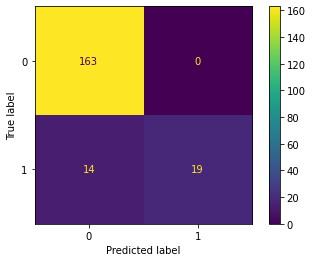

In [32]:
plot_confusion_matrix(rfModel, X_test, y_test)

In [33]:
dump(rfModel, 'rf.joblib')

['rf.joblib']

In [34]:
rfModel2 = load('rf.joblib')

In [35]:
rfModel2.score(X_test, y_test)

0.9285714285714286

In [36]:
X_train

,hr,ibi,sdnn,sdsd,rmssd,pnn20,pnn50,hr_mad,sd1,sd2,s,sd1/sd2,breathingrate
P24C3,77.803667,771.171875,35.929772,18.582813,31.464341,0.523810,0.119048,25.390625,22.084655,45.944234,3187.656407,0.480684,0.051904
P13C21,77.528090,773.913043,26.985462,9.762060,17.957173,0.256637,0.000000,19.531250,12.681724,35.654340,1420.497849,0.355685,0.078699
P40C18,80.913082,741.536458,74.087283,38.131334,49.982796,0.363636,0.272727,54.687500,35.235076,98.967182,10955.098551,0.356028,0.056224
P20C24,77.986755,769.361413,36.561917,8.536305,20.297470,0.428571,0.000000,27.343750,11.718750,25.395224,934.938849,0.461455,0.056551
P03C13,64.753598,926.589440,60.570806,19.304762,31.614090,0.545455,0.090909,42.968750,21.967230,87.367788,6029.433584,0.251434,0.148937
...,...,...,...,...,...,...,...,...,...,...,...,...,...
P04C27,64.835660,925.416667,60.158527,34.083506,61.334412,0.756757,0.445946,42.968750,43.366830,71.792908,9781.131548,0.604055,0.259474
P31C5,82.483449,727.418664,62.427206,48.798993,62.790416,0.634615,0.192308,35.156250,44.326261,66.361282,9241.143917,0.667954,0.131911
P55C22,75.241428,797.433036,42.736210,18.480411,30.257682,0.466667,0.133333,35.156250,20.087563,49.491501,3123.257228,0.405879,0.089634
P18C27,67.758757,885.494403,76.060673,20.616860,32.462916,0.467742,0.145161,46.875000,22.552804,99.264167,7033.037197,0.227200,0.067456


# Code for Hannah

In [37]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from joblib import dump, load

In [38]:
inputArray = dataStretched['P1V1'].values #Assuming this array is a array of 364 values

# Normalize the values of input
# Numpy array is just regular array
normArr = np.zeros([364])
amin, amax = min(inputArray), max(inputArray)
for i in range(0,len(inputArray)):
    val = inputArray[i]
    normArr[i] = (val-amin) / (amax-amin)

#Load model weights in from joblib file
rfModel = load('ada.joblib')
# label of 1 is stress, 0 otherwise
pred = rfModel.predict(normArr.reshape(1,-1))

NameError: name 'dataStretched' is not defined

In [ ]:
adaModel = load('ada.joblib')